<a href="https://colab.research.google.com/github/jaideep018/projects/blob/main/flight_price_pred_kn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train=pd.read_excel('/content/Data_Train.xlsx')

In [ ]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train['Day_of_Journey']=df_train['Date_of_Journey'].str.split('/').str[0]
df_train['Month_of_Journey']=df_train['Date_of_Journey'].str.split('/').str[1]
df_train['Year_of_Journey']=df_train['Date_of_Journey'].str.split('/').str[2]


In [ ]:
df_train['Day_of_Journey']=df_train['Day_of_Journey'].astype(int)
df_train['Month_of_Journey']=df_train['Month_of_Journey'].astype(int)
df_train['Year_of_Journey']=df_train['Year_of_Journey'].astype(int)
df_train.drop('Date_of_Journey',axis=1,inplace=True)


In [ ]:
df_train['Month_of_Journey'].value_counts()

5    3465
6    3414
3    2724
4    1079
Name: Month_of_Journey, dtype: int64

Text(0, 0.5, 'Count of flights')

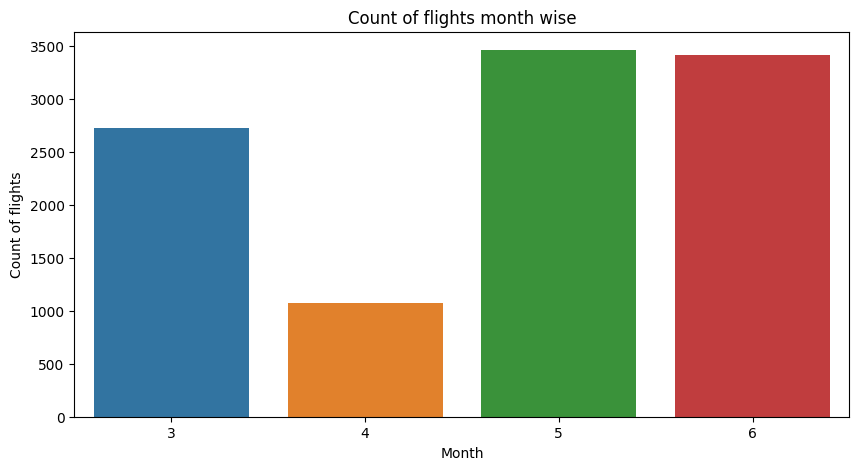

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month_of_Journey', data = df_train)
plt.xlabel('Month')
plt.ylabel('Count of flights')

In [ ]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"]=pd.to_datetime(df_train['Dep_Time']).dt.minute
df_train.drop('Dep_Time',inplace=True,axis=1)


In [ ]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [ ]:
df_train['Arrival_Hour']=pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_Min']=pd.to_datetime(df_train['Arrival_Time']).dt.minute
df_train.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [ ]:
df_train['Duration_min']=df_train['Duration'].str.split('h').str[1]


In [ ]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,45m


In [ ]:
df_train[df_train['Duration_min']=='']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_min
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,23h,2 stops,No info,13381,12,6,2019,20,15,19,15,
33,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,22h,2 stops,In-flight meal not included,10919,15,6,2019,14,35,12,35,
44,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h,1 stop,No info,13062,21,3,2019,9,0,21,0,
53,IndiGo,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,3943,18,6,2019,21,15,0,15,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,Jet Airways,Delhi,Cochin,DEL → ATQ → BOM → COK,23h,2 stops,No info,14300,12,6,2019,20,0,19,0,
10638,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,14h,1 stop,In-flight meal not included,7832,21,3,2019,21,25,11,25,
10639,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,38h,3 stops,No info,10493,3,6,2019,5,15,19,15,
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h,2 stops,No info,16704,27,5,2019,13,25,4,25,


In [ ]:
df_train['Duration_Minutes']=df_train['Duration_min'].str.split('m').str[0]

In [ ]:
Duration_Min= df_train['Duration_Minutes'].replace([''],'0')

In [ ]:
df_train['Duration_Min']=Duration_Min

In [ ]:
df_train['Duration_hour']=df_train['Duration'].str.split('h').str[0]

In [ ]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_min,Duration_Minutes,Duration_Min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50m,50,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,25m,25,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,,,0,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,25m,25,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,45m,45,45,4


In [ ]:
df_train.drop(['Duration','Duration_min','Duration_Minutes'],axis=1,inplace=True)
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,45,4


In [ ]:
df_train.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_Journey       int64
Month_of_Journey     int64
Year_of_Journey      int64
Dep_hour             int64
Dep_min              int64
Arrival_Hour         int64
Arrival_Min          int64
Duration_Min        object
Duration_hour       object
dtype: object

In [ ]:
df_train['Duration_Min'].isnull().sum()


1

In [ ]:
df_train[df_train['Duration_Min'].isnull()=='True'].dropna()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Min,Duration_hour


In [ ]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,45,4


In [ ]:
df_train.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_Journey       int64
Month_of_Journey     int64
Year_of_Journey      int64
Dep_hour             int64
Dep_min              int64
Arrival_Hour         int64
Arrival_Min          int64
Duration_Min        object
Duration_hour       object
dtype: object

In [ ]:
df_train.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
Day_of_Journey      0
Month_of_Journey    0
Year_of_Journey     0
Dep_hour            0
Dep_min             0
Arrival_Hour        0
Arrival_Min         0
Duration_Min        1
Duration_hour       0
dtype: int64

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
Day_of_Journey      0
Month_of_Journey    0
Year_of_Journey     0
Dep_hour            0
Dep_min             0
Arrival_Hour        0
Arrival_Min         0
Duration_Min        0
Duration_hour       0
dtype: int64

In [ ]:
df_train['Duration_Min']=df_train['Duration_Min'].astype(int)
df_train['Duration_hour']=df_train['Duration_hour'].astype(int)

Text(0, 0.5, 'Count of flights')

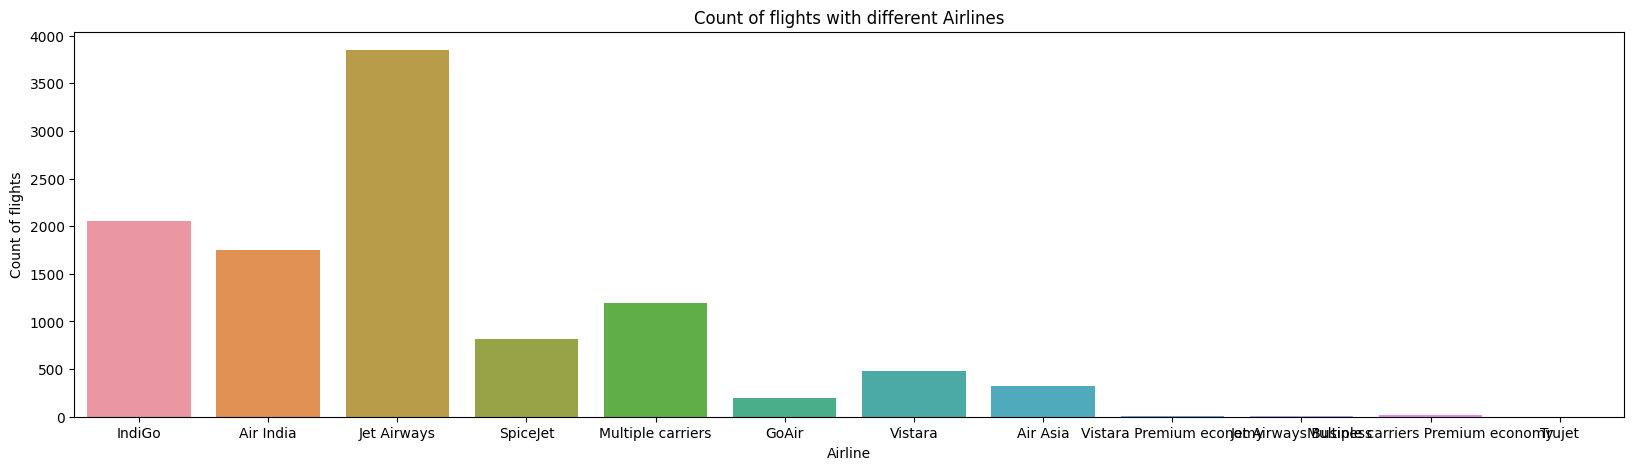

In [ ]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data =df_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')

In [ ]:
df_train["Airline"].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

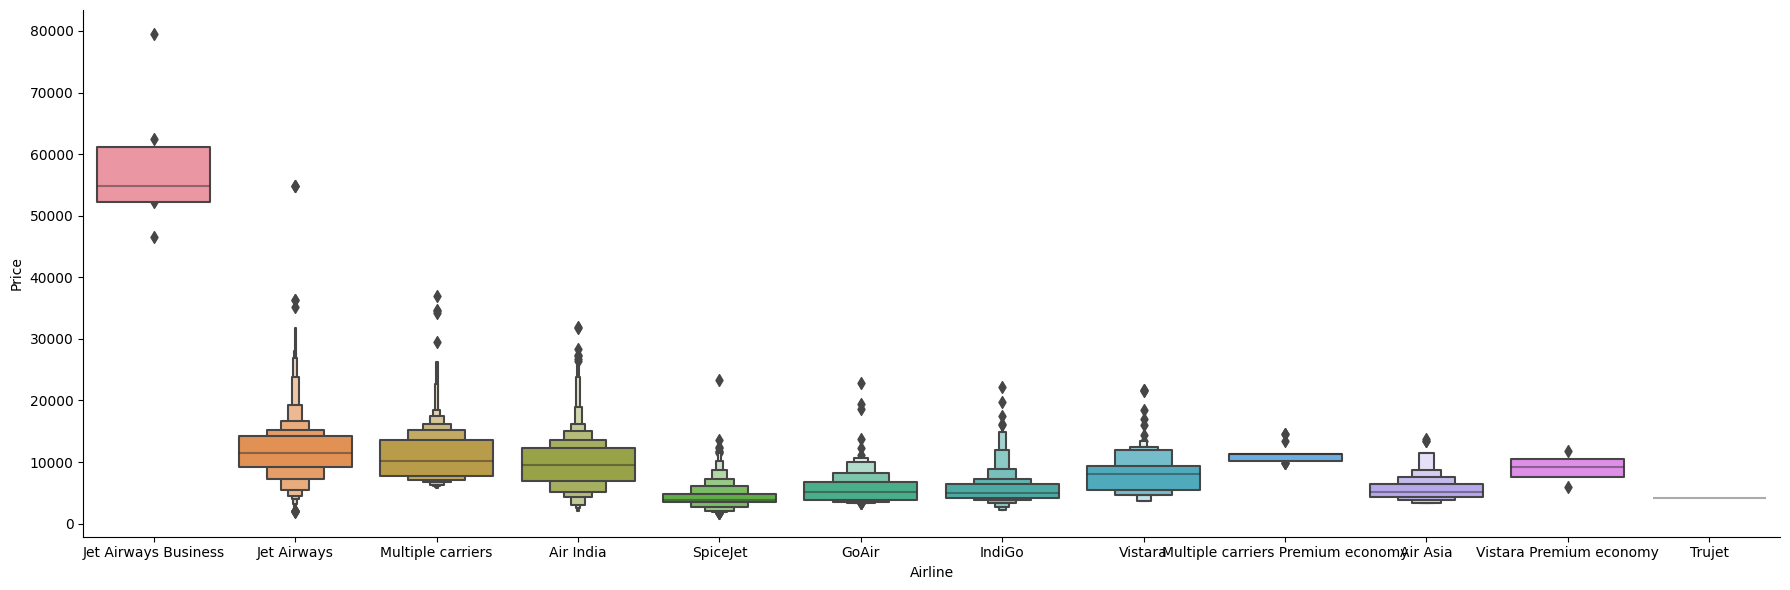

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)


In [ ]:
Airline=df_train[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,45,4


In [ ]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

Text(0, 0.5, 'Count of flights')

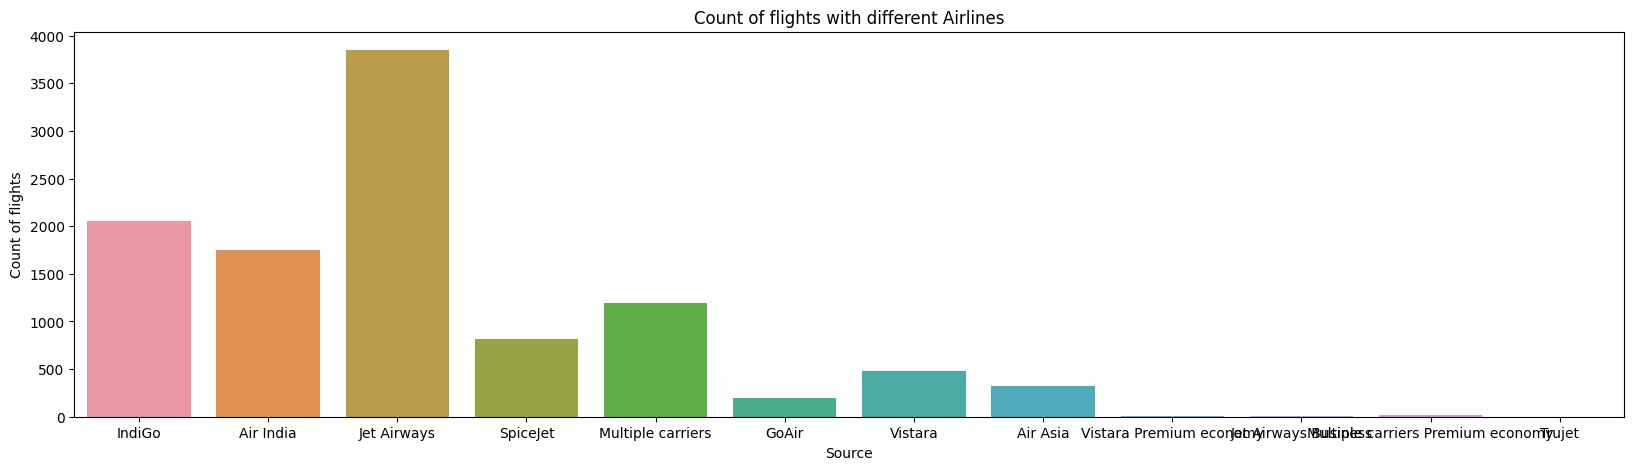

In [ ]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data =df_train)
plt.xlabel('Source')
plt.ylabel('Count of flights')

In [ ]:
df_train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

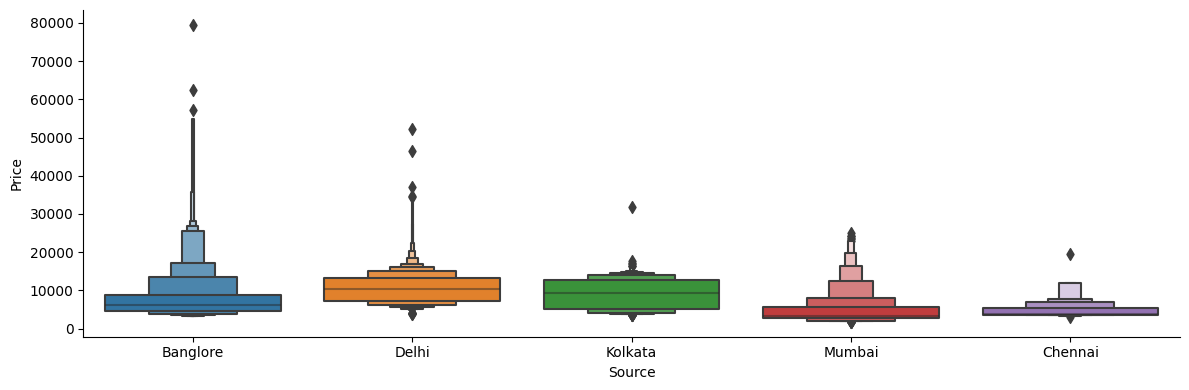

In [ ]:
sns.catplot(x="Source",y="Price",data=df_train.sort_values("Price",ascending=False),kind='boxen',height=4,aspect=3)
plt.show()

In [ ]:
Source=df_train[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

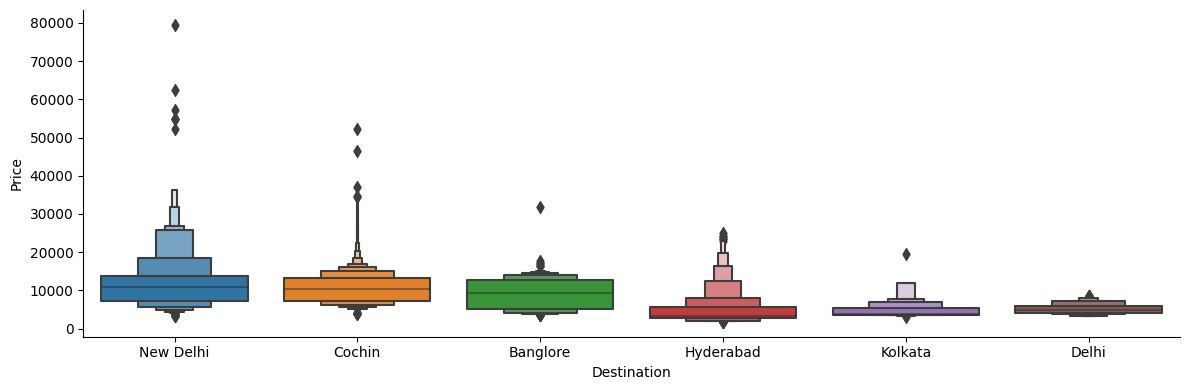

In [ ]:
sns.catplot(x="Destination",y="Price",data=df_train.sort_values("Price",ascending=False),kind="boxen",height=4,aspect=3)

In [ ]:
Destination=df_train[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
df_train["Total_Stops"].value_counts()


1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
df_train['Total_Stops']=df_train['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Min,Duration_hour
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,25,7
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,25,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,45,4


In [ ]:
df_train=pd.concat([df_train,Airline,Destination,Source],axis=1)

In [ ]:
df_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [ ]:
df_train.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Min,...,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,2019,22,20,1,10,50,...,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,2019,5,50,13,15,25,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,2019,9,25,4,25,0,...,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,2019,18,5,23,30,25,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,2019,16,50,21,35,45,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_train.dtypes

Total_Stops                                  int64
Price                                        int64
Day_of_Journey                               int64
Month_of_Journey                             int64
Year_of_Journey                              int64
Dep_hour                                     int64
Dep_min                                      int64
Arrival_Hour                                 int64
Arrival_Min                                  int64
Duration_Min                                 int64
Duration_hour                                int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                 

In [ ]:
df_train.shape


(10681, 31)

In [ ]:
df_train.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Year_of_Journey', 'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_Min',
       'Duration_Min', 'Duration_hour', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [ ]:
X=df_train.drop('Price',axis=1)
X.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Min,Duration_hour,...,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,24,3,2019,22,20,1,10,50,2,...,0,0,0,0,0,1,0,0,0,0
1,2,1,5,2019,5,50,13,15,25,7,...,0,0,0,0,0,0,0,0,1,0
2,2,9,6,2019,9,25,4,25,0,19,...,0,1,0,0,0,0,0,1,0,0
3,1,12,5,2019,18,5,23,30,25,5,...,0,0,0,0,0,0,0,0,1,0
4,1,1,3,2019,16,50,21,35,45,4,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y=df_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

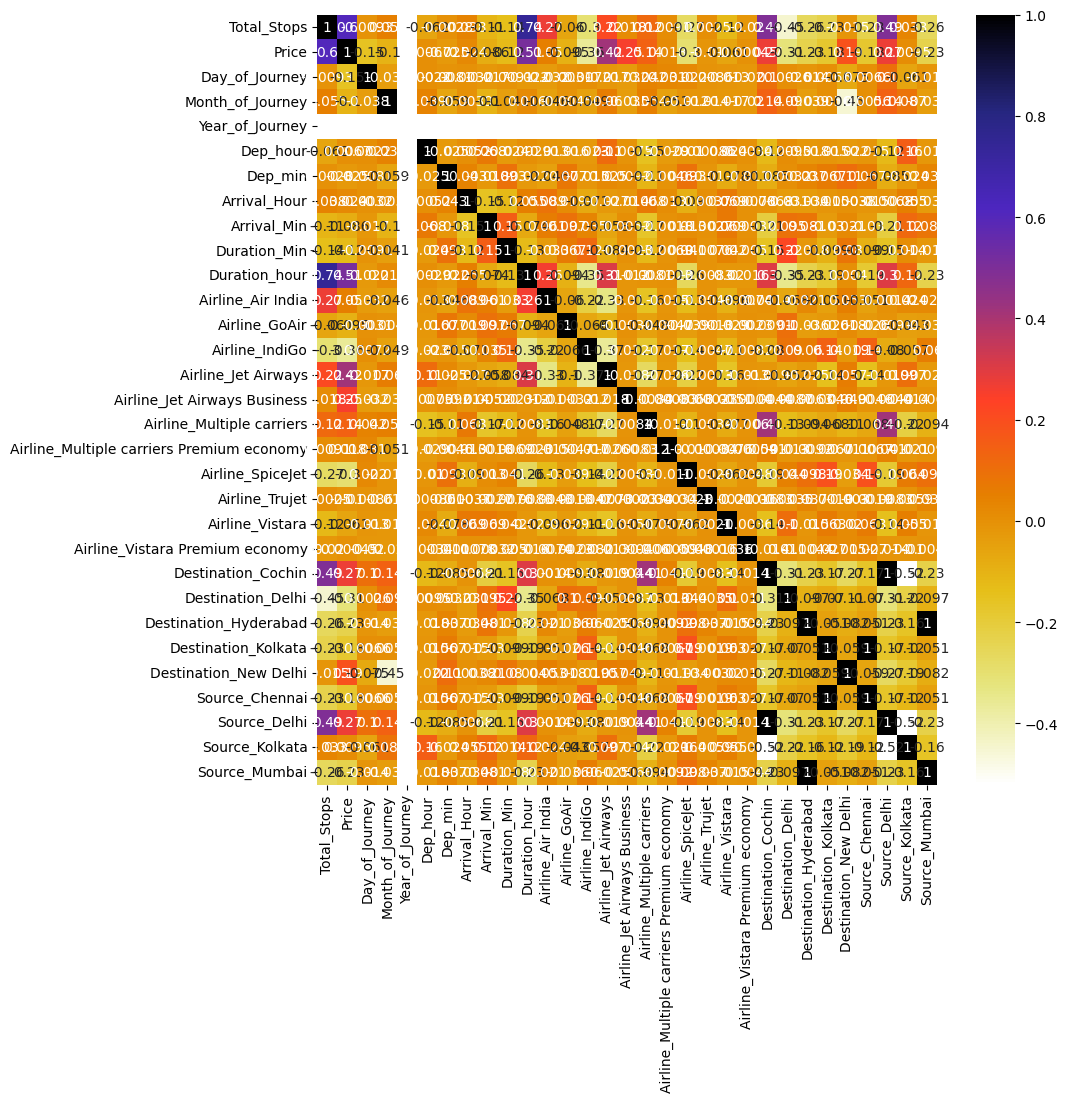

In [ ]:
plt.figure(figsize=(10,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

4

In [ ]:
corr_features

{'Duration_hour', 'Source_Chennai', 'Source_Delhi', 'Source_Mumbai'}

\plt.figure(figsize=(14,16))
sns.heatmap(df_train.corr(),annot=True,cmap = "RdYlGn")
plt.show()


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[2.37268564e-01 1.44617685e-01 5.30208808e-02 0.00000000e+00
 2.43626718e-02 2.10410659e-02 2.74920315e-02 1.97427037e-02
 1.74063844e-02 9.84582004e-02 1.10767323e-02 2.07789444e-03
 1.86976646e-02 1.42987335e-01 6.73301093e-02 1.71913039e-02
 8.19203561e-04 3.62808138e-03 1.00580039e-04 5.75164708e-03
 8.33524674e-05 1.47817996e-02 1.52535485e-02 6.24674839e-03
 5.00526446e-04 2.47731284e-02 5.17747886e-04 1.32322125e-02
 3.03814192e-03 8.50205451e-03]


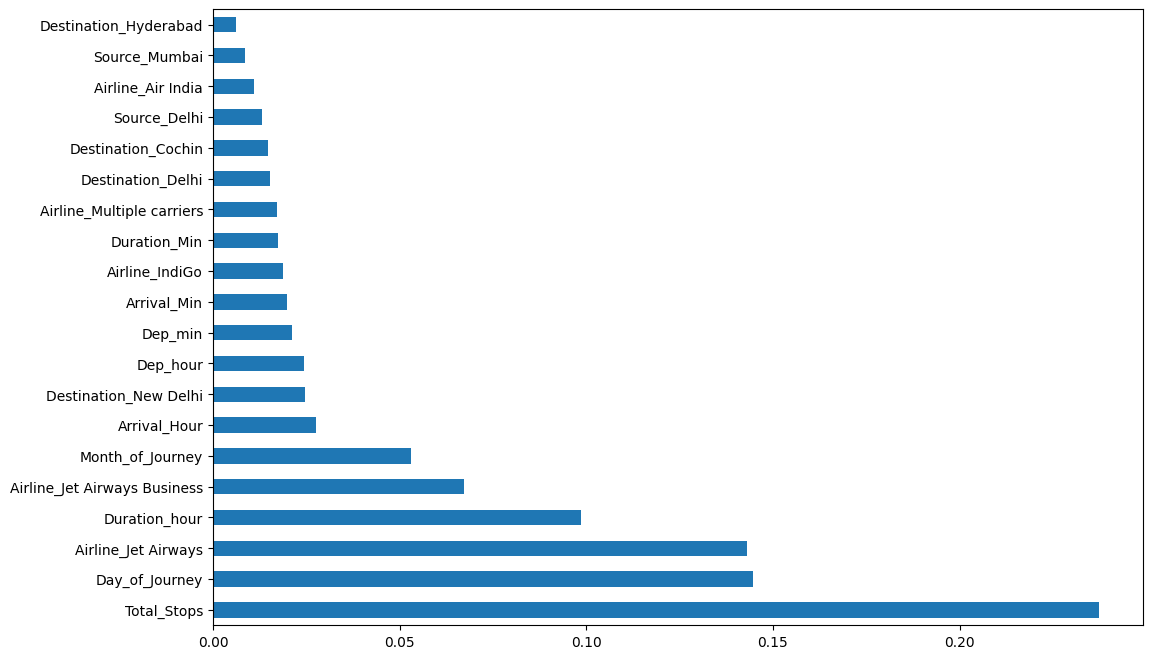

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
x=df_train[['Source_Mumbai',
'Destination_Hyderabad',
'Airline_Air India',
'Destination_Cochin',
'Source_Delhi',
'Destination_Delhi',
'Airline_Multiple carriers',
'Duration_Min',
'Airline_IndiGo',
'Arrival_Min',
'Dep_min',
'Dep_hour',
'Destination_New Delhi',
'Arrival_Hour',
'Month_of_Journey',
'Airline_Jet Airways Business',
'Duration_hour',
'Airline_Jet Airways',
'Day_of_Journey',
'Total_Stops']]
Y=df_train['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,Y_train)

RandomForestRegressor()

from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,Y_train)

In [ ]:
Y_pred=reg_rf.predict(x_test)

In [ ]:
reg_rf.score(x_train,Y_train)


0.9506212223558317

In [ ]:
 reg_rf.score(x_test,Y_test)


0.812173414678813

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)


0.9562379447091355

In [ ]:
print(round(reg_rf.score(X_test, y_test),2)*100,"%")


82.0 %


<ipython-input-211-75adb1dd5983>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


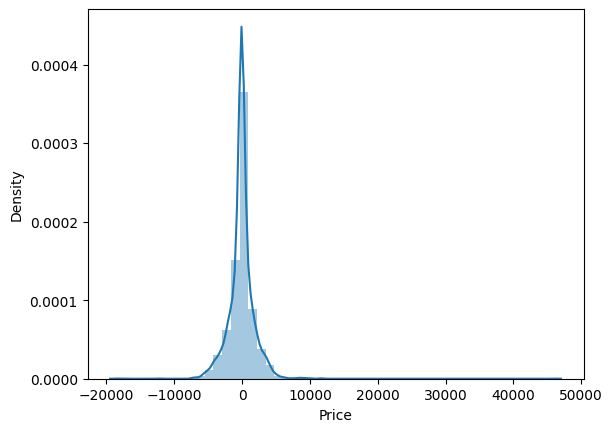

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)

1932.1088907021344


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.817939059295794

In [ ]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print(Adj_r2)


0.8174262115755004


In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
y_pred=rf_random.predict(X_test)

In [ ]:
rf_random.score(X_train,y_train)

0.9057894657733698

In [ ]:
rf_random.score(X_test,y_test)

0.8311966675510543

In [ ]:
from sklearn.Linear_Model import LinearRegression
lr=LinearRegression()

ModuleNotFoundError: ignored